# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [87]:
train = pd.read_csv('titanic_train.csv')

In [88]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


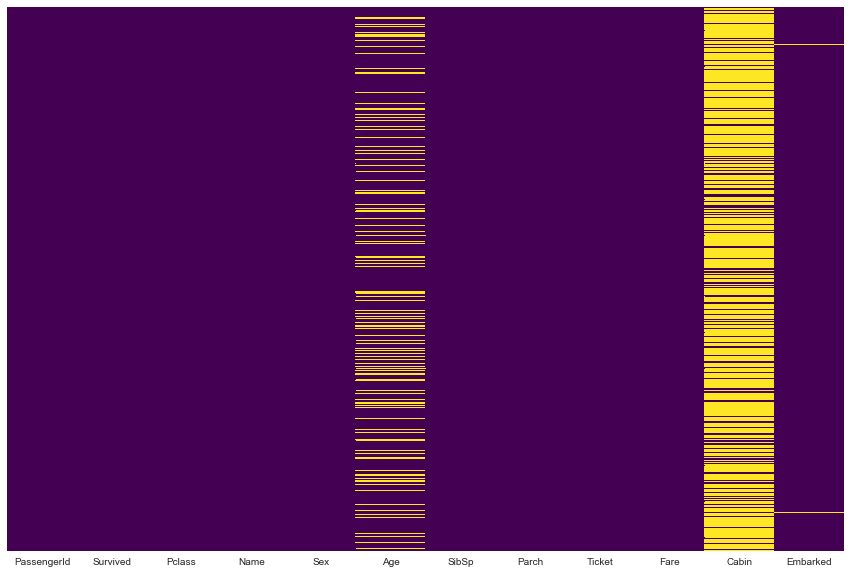

In [90]:
from matplotlib.pyplot import figure
figure(figsize=(15,10))
sns.heatmap(train.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [91]:
titanicDesc = []

for i in train.columns:
    if i == 'class' or i == 'deck':
        titanicDesc.append([i, train[i].dtypes, train[i].isna().sum(), round((((train[i].isna().sum())/(len(train)))*100),2), 
                    train[i].nunique(), list(train[i].cat.categories)[0:2]])
    else:
        titanicDesc.append([i, train[i].dtypes, train[i].isna().sum(), round((((train[i].isna().sum())/(len(train)))*100),2), 
                    train[i].nunique(), train[i].drop_duplicates().sample(2).values])
pd.DataFrame(titanicDesc, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])    

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,PassengerId,int64,0,0.00,891,"[634, 527]"
1,Survived,int64,0,0.00,2,"[0, 1]"
2,Pclass,int64,0,0.00,3,"[3, 2]"
3,Name,object,0,0.00,891,"[Lindahl, Miss. Agda Thorilda Viktoria, Hickma..."
4,Sex,object,0,0.00,2,"[male, female]"
5,Age,float64,177,19.87,88,"[45.0, 58.0]"
6,SibSp,int64,0,0.00,7,"[2, 5]"
7,Parch,int64,0,0.00,7,"[6, 4]"
8,Ticket,object,0,0.00,681,"[113055, 239853]"
9,Fare,float64,0,0.00,248,"[14.4542, 133.65]"


Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

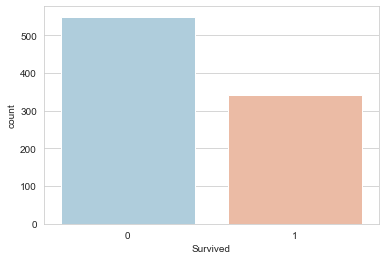

In [92]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

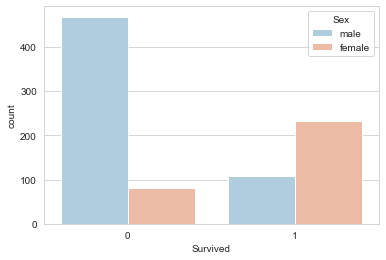

In [93]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

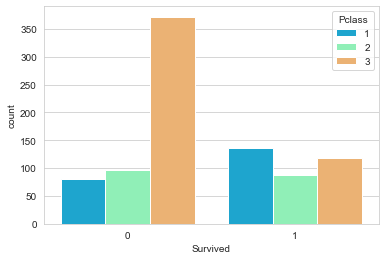

In [94]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

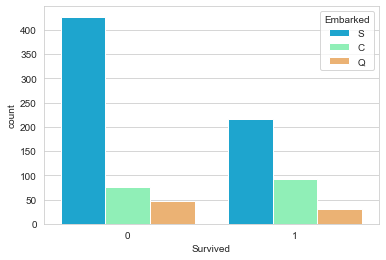

In [95]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked',data=train,palette='rainbow')

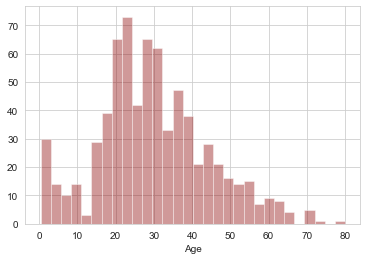

In [96]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

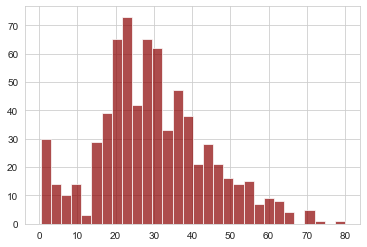

In [97]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

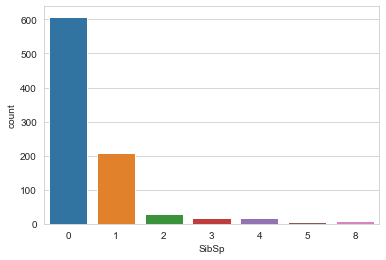

In [98]:
sns.countplot(x='SibSp',data=train)

In [99]:
train[train['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [100]:
test = pd.read_csv('titanic_test.csv')

In [101]:
test[test['SibSp'] == 8]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
188,1080,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
360,1252,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


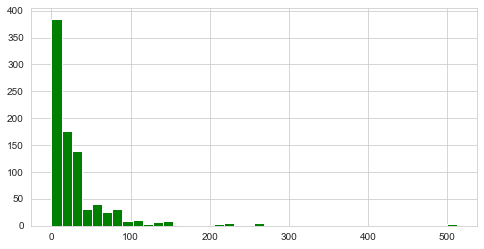

In [102]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [103]:
train[train['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


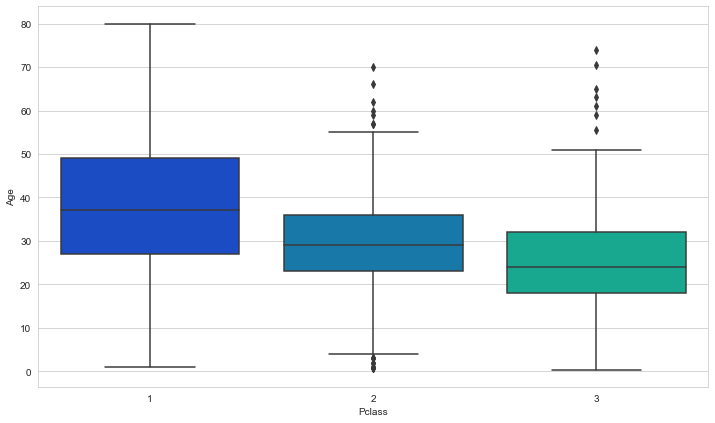

In [104]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [105]:
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [106]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isna(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

Now apply that function!

In [107]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

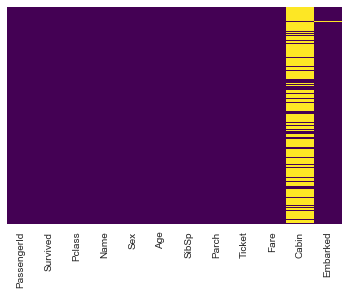

In [108]:
sns.heatmap(train.isna(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [109]:
train.drop('Cabin',axis=1,inplace=True)

In [110]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [111]:
train.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [113]:
# sex = pd.get_dummies(train['Sex'],drop_first=True)
# embark = pd.get_dummies(train['Embarked'],drop_first=True)
# pclass = pd.get_dummies(train['Pclass'],drop_first=True)
# SibSp = pd.get_dummies(train['SibSp'], drop_first =True)

In [114]:
# train.drop(['Sex','Embarked','Name','Ticket', 'PassengerId', 'Pclass', 'SibSp'],axis=1,inplace=True)

In [115]:
# train = pd.concat([train,sex,embark, pclass, SibSp],axis=1)

In [116]:
# train.head()

In [117]:
train = pd.get_dummies(data = train, drop_first = True, columns = ['Sex','Embarked', 'Pclass', 'SibSp'])

In [118]:
train.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'Parch', 'Ticket', 'Fare',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8'],
      dtype='object')

In [34]:
train.drop(['Name','Ticket', 'PassengerId'],axis=1,inplace=True)

Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [119]:
from sklearn.model_selection import train_test_split

In [78]:
train.dropna(inplace = True)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(train[['Age', 'Sex_male', 'Pclass_2', 'Pclass_3']], 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [37]:
train['Survived'].unique()

array([0, 1], dtype=int64)

## Training and Predicting

In [38]:
from sklearn.linear_model import LogisticRegression

In [121]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
predictions = logmodel.predict(X_test)

In [123]:
train['Survived'].unique()

array([0, 1], dtype=int64)

In [124]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1], dtype=int64)

In [125]:
PredictProb = logmodel.predict_proba(X_test)
PredictProb

array([[0.8943523 , 0.1056477 ],
       [0.8943523 , 0.1056477 ],
       [0.1882185 , 0.8117815 ],
       [0.13709355, 0.86290645],
       [0.8943523 , 0.1056477 ],
       [0.96002501, 0.03997499],
       [0.8943523 , 0.1056477 ],
       [0.75518219, 0.24481781],
       [0.92257535, 0.07742465],
       [0.43857232, 0.56142768],
       [0.22157641, 0.77842359],
       [0.06967026, 0.93032974],
       [0.8943523 , 0.1056477 ],
       [0.43857232, 0.56142768],
       [0.8943523 , 0.1056477 ],
       [0.87707875, 0.12292125],
       [0.1145822 , 0.8854178 ],
       [0.19857785, 0.80142215],
       [0.43017293, 0.56982707],
       [0.90064077, 0.09935923],
       [0.8943523 , 0.1056477 ],
       [0.8943523 , 0.1056477 ],
       [0.60843608, 0.39156392],
       [0.67883643, 0.32116357],
       [0.83047416, 0.16952584],
       [0.51616479, 0.48383521],
       [0.49053101, 0.50946899],
       [0.49808839, 0.50191161],
       [0.79407725, 0.20592275],
       [0.67926222, 0.32073778],
       [0.

Let's move on to evaluate our model!

In [45]:
#If we want to adjust the treshold
predictions = []
for pred in PredictProb[:,0]:
    if(pred > 0.30):
        predictions.append(0)
    else:
        predictions.append(1)

## Evaluation

We can check precision,recall,f1-score using classification report!

In [143]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,accuracy_score, matthews_corrcoef, auc, log_loss

In [126]:
X_train.head()

,Age,Sex_male,Pclass_2,Pclass_3
807,18.0,0,0,1
651,18.0,0,1,0
2,26.0,0,0,1
690,31.0,1,0,0
196,25.0,1,0,1


In [127]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       163
           1       0.78      0.65      0.71       104

    accuracy                           0.79       267
   macro avg       0.79      0.77      0.78       267
weighted avg       0.79      0.79      0.79       267



In [128]:
con = pd.DataFrame(data=confusion_matrix(y_test, predictions), columns =['P No', 'P Yes'], index = ['A No', 'A Yes'])
print(con)

       P No  P Yes
A No    144     19
A Yes    36     68


In [129]:
accuracy_score(y_test, predictions)

0.7940074906367042

In [130]:
matthews_corrcoef(y_test, predictions)

0.5590062598647395

Multiclass classification
$$ - \frac{1}{N} \sum_{i=1}^N \sum_{j=1}^M y_{ij} \log \, p_{ij} $$

Binary Classification
$$ - \frac{1}{N} \sum_{i=1}^N [y_{i} \log \, p_{i} + (1 - y_{i}) \log \, (1 - p_{i})].$$

In [131]:
log_loss(y_test, PredictProb)

0.44798758480760315

In [132]:
threshold

array([1.96283739, 0.96283739, 0.72459918, 0.71201097, 0.68587931,
       0.67061517, 0.63105009, 0.6310298 , 0.63102304, 0.63096443,
       0.62306903, 0.62085266, 0.60794749, 0.58954214, 0.58305916,
       0.57160197, 0.5435826 , 0.51169614, 0.48380481, 0.47342806,
       0.45698785, 0.44002601, 0.42592286, 0.4257609 , 0.42084507,
       0.41744429, 0.41375227, 0.40779384, 0.40022678, 0.39449071,
       0.39162893, 0.38569327, 0.36438603, 0.35478122, 0.34200129,
       0.33999918, 0.31487134, 0.31005802, 0.30441083, 0.30351302,
       0.30332678, 0.281011  , 0.27822867, 0.27646136, 0.26867164,
       0.26106865, 0.23963273, 0.23960033, 0.20730842, 0.18884042,
       0.17221049, 0.16932013, 0.16341154, 0.1453807 , 0.14518833,
       0.13296546, 0.13294424, 0.1239825 , 0.12287006, 0.11902993,
       0.11898222, 0.11867211, 0.11700629, 0.11534836, 0.11522788,
       0.11519234, 0.11190215, 0.1044384 , 0.10436146, 0.10132198,
       0.10119244, 0.10115985, 0.10113433, 0.10098127, 0.09901

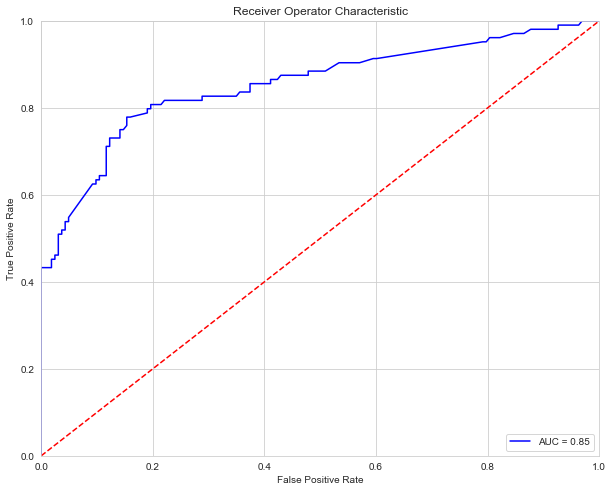

In [133]:
preds = PredictProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Not so bad! You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?

## Great Job!

In [71]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [134]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,sm.add_constant(X_train))
result=logit_model.fit(method='bfgs', maxiter = 100)
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.453663
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.317     
Dependent Variable: Survived         AIC:              574.3569  
Date:               2020-02-20 12:05 BIC:              596.5216  
No. Observations:   622              Log-Likelihood:   -282.18   
Df Model:           4                LL-Null:          -412.87   
Df Residuals:       617              LLR p-value:      2.2931e-55
Converged:          1.0000           Scale:            1.0000    
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         3.6294    0.4636    7.8288  0.0000   2.7208   4.5380
Age          -0.0381    0.0096   -3.9767  0.0001  -0.0569 

C:\Users\MSI\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [56]:
train.head()

,Survived,Age,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,0,22.0,0,7.2500,1,0,1,0,1,1,0,0,0,0,0
1,1,38.0,0,71.2833,0,0,0,0,0,1,0,0,0,0,0
2,1,26.0,0,7.9250,0,0,1,0,1,0,0,0,0,0,0
3,1,35.0,0,53.1000,0,0,1,0,0,1,0,0,0,0,0
4,0,35.0,0,8.0500,1,0,1,0,1,0,0,0,0,0,0


In [136]:
def cramers_v(x, y):
    import scipy.stats as ss
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [137]:
train = pd.read_csv('titanic_train.csv')

In [142]:
cramers_v(train['Embarked'], train['Survived'])

0.16605833339661635